In [1]:
%%capture
%load_ext autoreload
%autoreload 2
import itertools as itt
import os
import sys
import holoviews as hv
import numpy as np
import xarray as xr
from dask.distributed import Client, LocalCluster
from holoviews.operation.datashader import datashade, regrid
from holoviews.util import Dynamic
from IPython.core.display import display
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
# Importing the custom helper functions
from calcium_behavior_alignment import *

from minian.utilities import (
    TaskAnnotation,
    get_optimal_chk,
    load_videos,
    open_minian,
    save_minian,
)

## Step 0 Initialize Variables

In [4]:
exp_path = "/scratch/09117/xz6783/minian/Satiation/"
id_path = "/scratch/09117/xz6783/minian/Satiation/Session Combined/"
beh_path = "/scratch/09117/xz6783/minian/Behavior_Files/"
experiment = "Satiation Protocol"

# exp_path = "/scratch/09656/dhh3/Satiation/"
# id_path = "/scratch/09656/dhh3/calcium-behavior-alignment/"
# beh_path = "/scratch/09656/dhh3/Behavior_Files/"

minian_path = "."

files = os.listdir(id_path)

animal_ids = [file for file in files if os.path.isdir(os.path.join(id_path, file)) and len(file) == 3 and file[0].isdigit()]

print(len(animal_ids))
animal_ids

19


['4B6',
 '2I5',
 '7B6',
 '6H6',
 '4N6',
 '8H6',
 '9M6',
 '2S5',
 '2N6',
 '6S5',
 '7M6',
 '1B6',
 '6M6',
 '1H6',
 '5B6',
 '1S5',
 '1I5',
 '7H6',
 '2Z4']

In [5]:
# animal_id ="7B6"   #change name for each animal
# minian_path = "."
# dpath = "/scratch/09656/dhh3/Satiation/Session Combined/1B6/"
# minian_ds_path = os.path.join(dpath, "minian")
# intpath = "./minian_intermediate"

# #change for each experiment:
# output_path_spike = r"E:\Xu\Miniscope\PL\Raw Data\Satiation\Session Combined\Spikes"   
# output_path_calcium = r"E:\Xu\Miniscope\PL\Raw Data\Satiation\Session Combined\Calcium"   
# output_path_calcium_hungry = r"E:\Xu\Miniscope\PL\Raw Data\Satiation\Session Combined\Calcium\Hungry"
# output_path_calcium_satiated = r"E:\Xu\Miniscope\PL\Raw Data\Satiation\Session Combined\Calcium\Satiated"

# subset1 = dict(frame=slice(0,23237))
# subset2 = dict(frame=slice(23238, None))



# os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["MKL_NUM_THREADS"] = "1"
# os.environ["OPENBLAS_NUM_THREADS"] = "1"
# os.environ["MINIAN_INTERMEDIATE"] = intpath

In [6]:
# # Set up Initial Basic Parameters#
# minian_path = "."
# dpath = "."
# minian_ds_path = os.path.join(dpath, "minian")
# intpath = "./minian_intermediate"
# subset = dict(frame=slice(0, None))
# subset_mc = None
# interactive = True
# output_size = 100
# n_workers = int(os.getenv("MINIAN_NWORKERS", 30))
# param_save_minian = {
#     "dpath": minian_ds_path,
#     "meta_dict": dict(session=-1, animal=-2),
#     "overwrite": True,
# }

# # Pre-processing Parameters#
# param_load_videos = {
#     "pattern": "[0-9]+\.avi$",
#     "dtype": np.uint8,
#     "downsample": dict(frame=1, height=1, width=1),
#     "downsample_strategy": "subset",
# }
# param_denoise = {"method": "median", "ksize": 7}
# param_background_removal = {"method": "tophat", "wnd": 15}

# # Motion Correction Parameters#
# subset_mc = None
# param_estimate_motion = {"dim": "frame"}

# # Initialization Parameters#
# param_seeds_init = {
#     "wnd_size": 1000,
#     "method": "rolling",
#     "stp_size": 500,
#     "max_wnd": 15,
#     "diff_thres": 3,
# }
# param_pnr_refine = {"noise_freq": 0.06, "thres": 1}
# param_ks_refine = {"sig": 0.05}
# param_seeds_merge = {"thres_dist": 10, "thres_corr": 0.8, "noise_freq": 0.06}
# param_initialize = {"thres_corr": 0.8, "wnd": 10, "noise_freq": 0.06}
# param_init_merge = {"thres_corr": 0.8}

# # CNMF Parameters#
# param_get_noise = {"noise_range": (0.06, 0.5)}
# param_first_spatial = {
#     "dl_wnd": 10,
#     "sparse_penal": 0.01,
#     "size_thres": (25, None),
# }
# param_first_temporal = {
#     "noise_freq": 0.06,
#     "sparse_penal": 1,
#     "p": 1,
#     "add_lag": 20,
#     "jac_thres": 0.2,
# }
# param_first_merge = {"thres_corr": 0.8}
# param_second_spatial = {
#     "dl_wnd": 10,
#     "sparse_penal": 0.01,
#     "size_thres": (25, None),
# }
# param_second_temporal = {
#     "noise_freq": 0.06,
#     "sparse_penal": 1,
#     "p": 1,
#     "add_lag": 20,
#     "jac_thres": 0.4,
# }

# os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["MKL_NUM_THREADS"] = "1"
# os.environ["OPENBLAS_NUM_THREADS"] = "1"
# os.environ["MINIAN_INTERMEDIATE"] = intpath

## Step 1: Parse Scope Times

In [162]:
# Parsing
scope_times = parse_scope_times(exp_path=exp_path,
                               id_path=id_path)

scope_times

{'4B6': {'4B6_2022_08_31_13_39_26':        Frame Number  Time Stamp (s)  Buffer Index
  0                 0          -0.023             0
  1                 1           0.049             0
  2                 2           0.079             0
  3                 3           0.128             0
  4                 4           0.179             0
  ...             ...             ...           ...
  14816         14816         749.773             0
  14817         14817         749.824             0
  14818         14818         749.874             0
  14819         14819         749.926             0
  14820         14820         749.976             0
  
  [14821 rows x 3 columns],
  '4B6_2022_08_31_15_02_01':        Frame Number  Time Stamp (s)  Buffer Index
  0                 0          -0.009             0
  1                 1           0.043             0
  2                 2           0.093             0
  3                 3           0.143             0
  4                 4   

## Step 2: Process animal data based on ID

In [8]:
behavior_dict = parse_behavior_times(beh_path=beh_path, experiment=experiment, animal_ids=animal_ids)

In [9]:
behavior_dict['5B6']

,Time (s),Speed (m/s),Freezing,In Food Area,Bar Press active,Miniscope record active,Tone active
0,0.000,NaN,0,0,0,0,0
1,1.023,0.080,0,0,0,0,0
2,1.135,0.089,0,0,0,0,0
3,1.263,0.095,0,0,0,0,0
4,1.391,0.084,0,0,0,0,0
...,...,...,...,...,...,...,...
63824,4559.356,0.047,0,1,0,0,0
63825,4559.484,0.034,0,1,0,0,0
63826,4559.627,0.024,0,1,0,0,0
63827,4559.755,0.022,0,1,0,0,0


## Step 3: Process spikes and calcium

In [10]:
dpath = os.path.join(id_path, "5B6")
minian_ds_path = os.path.join(dpath, "minian")
minian_ds = open_minian(minian_ds_path)

In [11]:
minian_ds_path

'/scratch/09117/xz6783/minian/Satiation/Session Combined/5B6/minian'

In [12]:
tracenew_spike, labelsnew_spike, tracenew_calcium, labelsnew_calcium = process_spikes_and_calcium(minian_ds, verbose=True)

Deleted 39 neurons out of the original 68 neurons, 29 neurons remain
Deleted 39 neurons out of the original 68 neurons, 29 neurons remain


## Step 4: Align and Interpolate

In [196]:
# Part of step two 
def test_combine_datasets(scope_times, behavior_data, animal_id, verbose=False):
    """
    Helper function that reads directly from scope_times and behavior, and concatenates scope_time if there are two entires.

    Args:
        scope_times (dict): A dictionary containing scope times for different animal IDs.
        behavior_data (dict): A dictionary containing behavioral data for different animal IDs.
        animal_id (str): The ID of the animal for which data needs to be concatenated.
        verbose (bool): Whether to print verbose output.

    Returns:
        tuple: A tuple containing the concatenated timestamps and behavior datasets.
    """
    # Retrieve the behavior data
    if animal_id in behavior_data:
        # Retrieve indicies in behavior_data where the recording resets
        record_active = behavior_data[animal_id]['Miniscope record active']
        time = behavior_data[animal_id]['Time (s)']
        time_diff = np.where(np.diff(record_active) != 0)[0] + 1
        
        # Section out time_diff into separate recording resets; i.e. if there is an index gap of at these 50, then there is a reset
        # recording_sections is a list of tuples, where each tuple is the (start, end) of a recording
        recording_sections = []
        section_start = time_diff[0]
        
        breaks = time_diff[np.where(np.diff(time_diff)>=50)[0]]
        print(breaks)
        if len(breaks) > 0:
            for break_idx in breaks:
                section_end = break_idx
                if section_end - section_start > 50:
                    recording_sections.append((section_start, section_end))
                section_start = next((idx for idx in time_diff if idx > break_idx), None)
                
        # Append the last (section_start, section_end)
        section_end = time_diff[-1]
        recording_sections.append((section_start, section_end))
                
        ret_behavior = behavior_data[animal_id].copy()

        # Offset ret_Behaviors by the first recording onset
        ret_behavior['Time (s)'] = ret_behavior['Time (s)'] - ret_behavior['Time (s)'].iloc[recording_sections[0][0]]

    else:
        # Just set ret_behavior to None and print an error message
        print(f"Error: No behavior data found for {animal_id}")
        ret_behavior = None
        
    # Check if the number of recording sections matches the scope times sections
    if len(recording_sections) != len(scope_times[animal_id]):
        print(f"Error: Number of recording sections ({len(recording_sections)}) does not match the number of scope times sections ({len(scope_times[animal_id])}) for {animal_id}")


    # Retrieve the timestamps
    if animal_id in scope_times and len(scope_times[animal_id]) > 1:
        # Concatenate datasets, accounting for gaps in recording using behavior miniscope record active.

        # Initialize ret_timestamps to the first timestamps dataset
        first_key = list(scope_times[animal_id].keys())[0]
        ret_timestamps = scope_times[animal_id][first_key].copy()

        for idx in range(1, len(scope_times[animal_id])):
            # Get the current timestamps dataset
            key = list(scope_times[animal_id].keys())[idx]
            timestamps = scope_times[animal_id][key].copy()
            
            # Get the gap based off of the time in behavior data, i.e. start of second part - end of first part
            start_of_next_recording = ret_behavior['Time (s)'].iloc[recording_sections[idx][0]]
            
            # Add the gap to the current timestamps dataset along with end of the previous timestamps dataset
            timestamps['Time Stamp (s)'] += start_of_next_recording

            # Concatenate the current timestamps dataset with the previous timestamps dataset
            ret_timestamps = pd.concat([ret_timestamps, timestamps], ignore_index=True)
    else:
        # Just set ret_timestamps to the singular timestamps dataset
        first_key = list(scope_times[animal_id].keys())[0]
        ret_timestamps = scope_times[animal_id][first_key]

    # Sanity check
    # Check if miniscope recording active - 1 is similar value as concatenated ret_timestamps last value
    if verbose:
        print(f"Combining Data ({animal_id}): Behavior end of recording: {ret_behavior['Time (s)'].iloc[-1] - 1}")
        print(f"Combining Data ({animal_id}): Timestamp last value {ret_timestamps['Time Stamp (s)'].iloc[-1]}")
        print(f"Combining Data ({animal_id}): breaks: {breaks} -> recording sections: {recording_sections}")
        
    return ret_timestamps, ret_behavior

In [199]:
timestamps, behavior = combine_datasets(scope_times, behavior_dict, "4B6", verbose=True)

Combining Data (4B6): Behavior end of recording: 4528.619
Combining Data (4B6): Timestamp last value 4518.2210000000005
Combining Data (4B6): breaks: [20670 30283 40075] -> recording sections: [(220, 20670), (41700, 62236)]


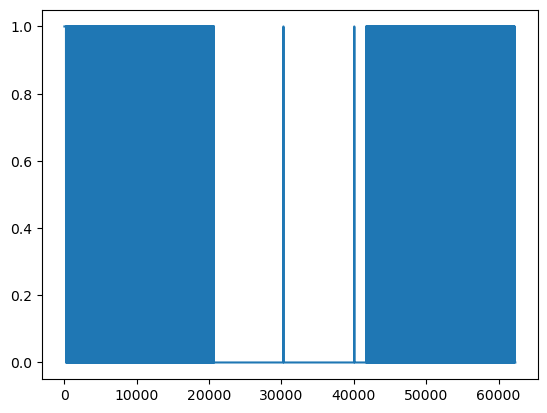

In [180]:
plt.plot(behavior_dict['4B6']['Miniscope record active'])

In [169]:
timestamps

,Frame Number,Time Stamp (s),Buffer Index
0,0,-0.045,0
1,1,0.006,0
2,2,0.056,0
3,3,0.106,0
4,4,0.157,0
...,...,...,...
29622,14785,4520.432,0
29623,14786,4520.483,0
29624,14787,4520.534,0
29625,14788,4520.585,0


In [170]:
behavior

,Time (s),Speed (m/s),Freezing,In Food Area,Bar Press active,Miniscope record active,Tone active
0,-30.714,NaN,0,0,0,0,0
1,-29.691,0.080,0,0,0,0,0
2,-29.579,0.089,0,0,0,0,0
3,-29.451,0.095,0,0,0,0,0
4,-29.323,0.084,0,0,0,0,0
...,...,...,...,...,...,...,...
63824,4528.642,0.047,0,1,0,0,0
63825,4528.770,0.034,0,1,0,0,0
63826,4528.913,0.024,0,1,0,0,0
63827,4529.041,0.022,0,1,0,0,0


### Spikes

In [171]:
tracealigned, labelsaligned = align_and_interpolate(animal_timestamps=timestamps, 
                                                    animal_behavior=behavior, 
                                                    tracenew=tracenew_spike, 
                                                    labelsnew=labelsnew_spike)

In [173]:
output_path_spike = os.path.join(id_path, "Spikes")

# Save spike
save_trace_and_labels(tracealigned, labelsaligned, output_path_spike, "5B6")

In [174]:
pd.read_pickle('/scratch/09117/xz6783/minian/Satiation/Session Combined/Spikes/5B6.pkl')

,0,1,2,3,4,5,6,7,8,9,...,29617,29618,29619,29620,29621,29622,29623,29624,29625,29626
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
10,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
11,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
29,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
16,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
17,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
18,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


### Calcium

In [161]:
tracealigned, labelsaligned = align_and_interpolate(animal_timestamps=timestamps, 
                                                    animal_behavior=behavior, 
                                                    tracenew=tracenew_calcium, 
                                                    labelsnew=labelsnew_calcium)

tracenew shape(29927, 139)
Cue(29937,)
Bar(29937,)
CATIME(29937,)
ENTERED PADDING
tracenew_padded:(29937, 139)


In [163]:
output_path_calcium = os.path.join(id_path, "Calcium")

# Save calcium
save_trace_and_labels(tracealigned, labelsaligned, output_path_calcium, "2IH")

## Try Main Execute on All Animal IDs

In [200]:
execute(exp_path=exp_path, id_path=id_path, beh_path=beh_path, experiment=experiment, num_processes=1, verbose=True)

Experiment path: /scratch/09117/xz6783/minian/Satiation/
Id path: /scratch/09117/xz6783/minian/Satiation/Session Combined/
Behavior path: /scratch/09117/xz6783/minian/Behavior_Files/
Found 19 animal IDs
Animal IDs: dict_keys(['4B6', '2I5', '7B6', '6H6', '4N6', '8H6', '9M6', '2S5', '2N6', '6S5', '7M6', '1B6', '6M6', '1H6', '5B6', '1S5', '1I5', '7H6', '2Z4'])
Found 14 animal IDs with two entries
Found 5 animal IDs with one entry
Erronous animal IDs: None
Processing and aligning 19 animal IDs with 1 process(es)


Processing animal ID 4B6
Combining Data (4B6): Behavior end of recording: 4528.619
Combining Data (4B6): Timestamp last value 4518.2210000000005
Combining Data (4B6): breaks: [20670 30283 40075] -> recording sections: [(220, 20670), (41700, 62236)]
Saved 4B6 Calciums to /scratch/09117/xz6783/minian/Satiation/Session Combined/Calcium
Saved 4B6 Spikes to /scratch/09117/xz6783/minian/Satiation/Session Combined/Spikes
Successfully aligned animal ID 4B6


Processing animal ID 2I5
Comb

[(True, '4B6'),
 (True, '2I5'),
 (True, '7B6'),
 (True, '6H6'),
 (False, '4N6'),
 (True, '8H6'),
 (True, '9M6'),
 (True, '2S5'),
 (False, '2N6'),
 (True, '6S5'),
 (True, '7M6'),
 (True, '1B6'),
 (True, '6M6'),
 (True, '1H6'),
 (True, '5B6'),
 (True, '1S5'),
 (True, '1I5'),
 (True, '7H6'),
 (True, '2Z4')]